# TRABAJO FINAL
# TECNICAS PARA LA CIENCIAS DE DATOS
### Miguel Santiago Gómez Suárez


In the following project, the development of [activities](EnunciadoTrabajo.pdf) set by company "A" will be carried out, encompassing the entire, albeit basic, cycle that an artificial intelligence project follows.

The detailed cycle can be observed in the following image:

<center>

<img src="LifeCycleDataScience.jpg" alt="https://i.pinimg.com/originals/73/c8/67/73c86739150c7cebd221aaaee70a19b0.jpg" width="30%"/>

</center>




## First Part
In the initial section of the notebook, our focus is on exploring the dataset and processing the information. Understanding the intricacies of the business is a fundamental step in the data science cycle. In this instance, our dataset contains scores from patients undergoing cognitive rehabilitation. Obtaining this dataset was made possible through our client.

Currently, we find ourselves engaged in the crucial stages of data cleaning and exploration. These steps are integral to unraveling insights and setting the foundation for subsequent analyses.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [2]:
# Load the CSV file into a DataFrame and explore the data set. The five first rows are shown below and the infor is printed.
data = pd.read_csv('dataInformation.csv', decimal=',', thousands='.')
print(data.head())
print(data.info())

   patient_id         day  score
0          75  2023-01-01   4208
1       48249  2023-01-01   2656
2       39201  2023-01-01    537
3       43205  2023-01-01   7233
4       47600  2023-01-01   5244
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465183 entries, 0 to 465182
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   patient_id  465183 non-null  int64 
 1   day         465183 non-null  object
 2   score       465183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.6+ MB
None


In [3]:
# We watched that the column 'day' is an object, so we need to convert it to datetime and we need to erase the information of patients that only have one day of information.
# These patients are not useful for our analysis. We organize the data by patient_id and day.

data['day'] = pd.to_datetime(data['day'])
id_counts = data['patient_id'].value_counts()
ids_to_keep = id_counts[id_counts > 1].index

data = data[data['patient_id'].isin(ids_to_keep)]

data = data.sort_values(by=['patient_id', 'day'])

In [4]:
#We show the data again to check that the changes have been made.
print(data.head())

        patient_id        day  score
15464           11 2023-01-16    488
28236           11 2023-01-24   4599
39770           11 2023-01-31    695
49101           11 2023-02-06   3605
224828          11 2023-05-22   4894


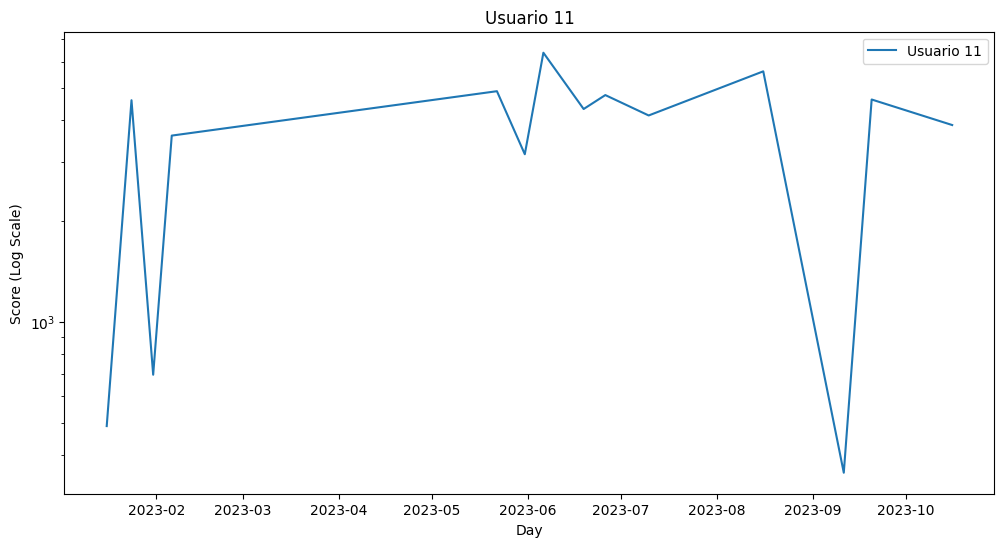

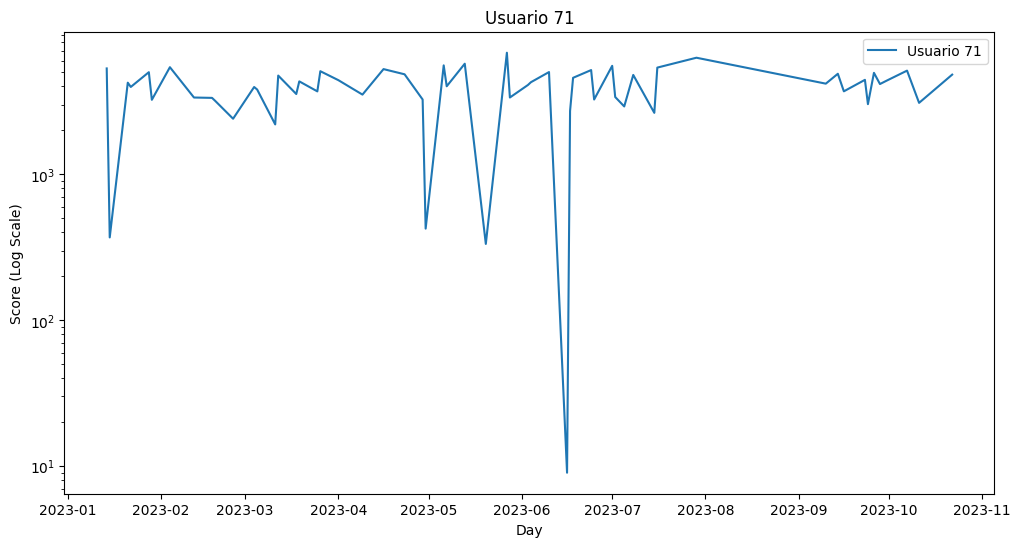

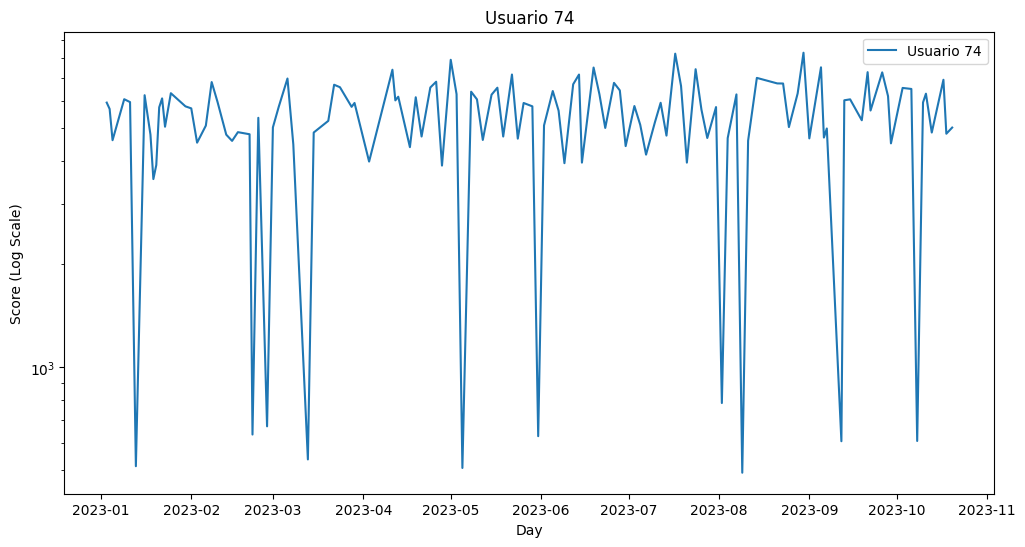

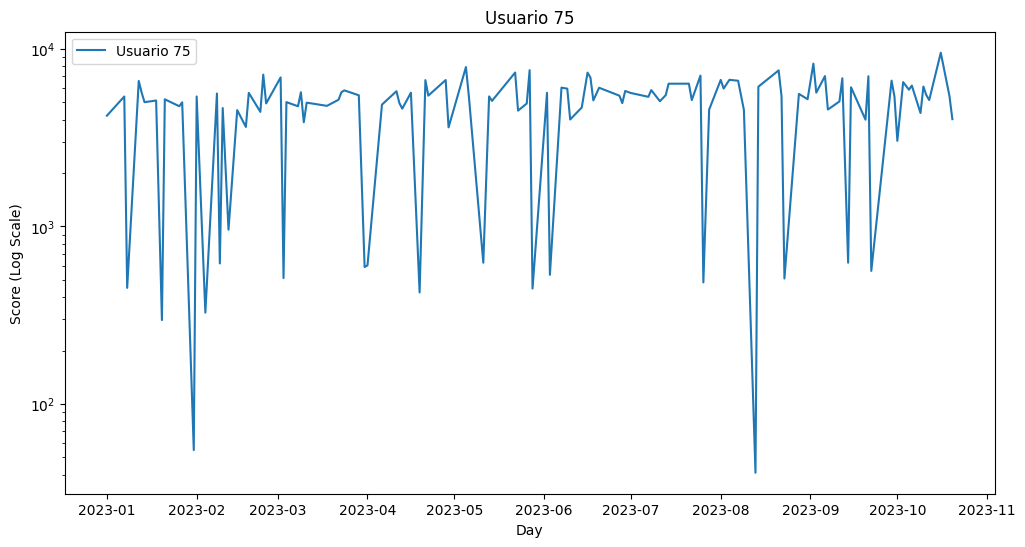

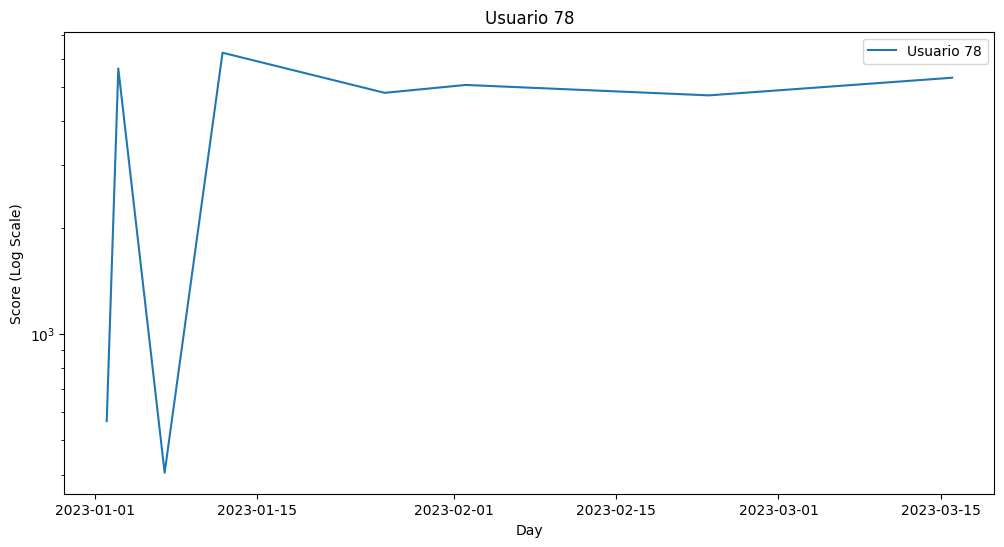

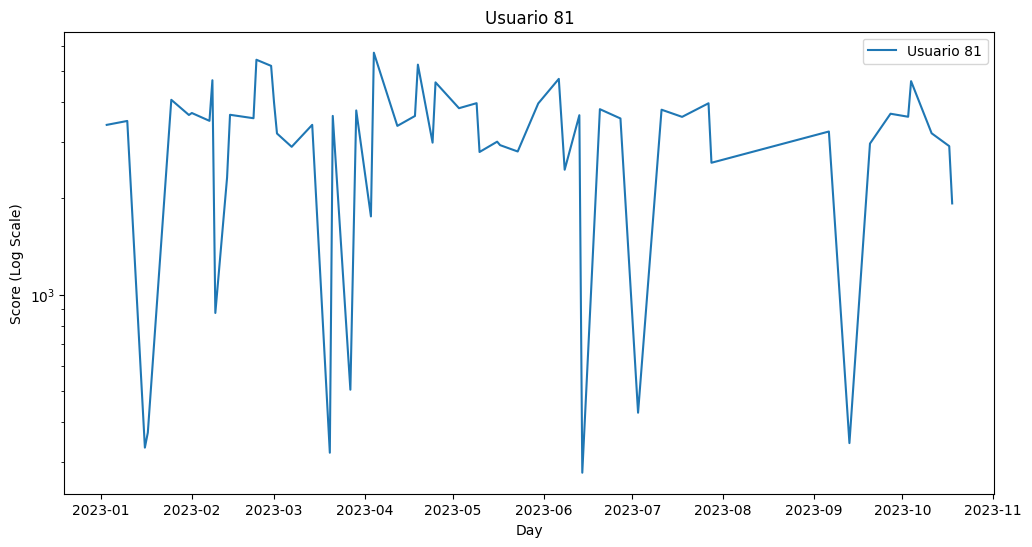

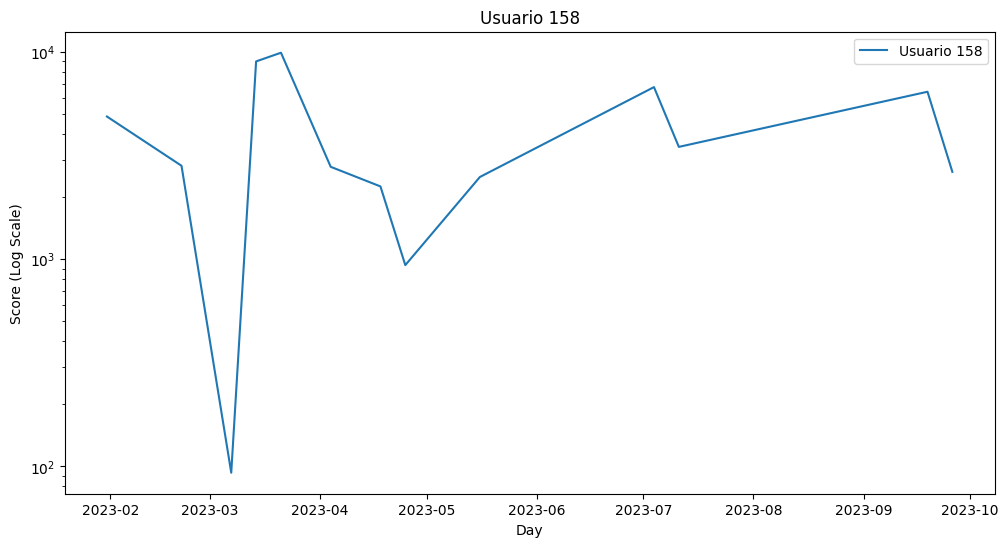

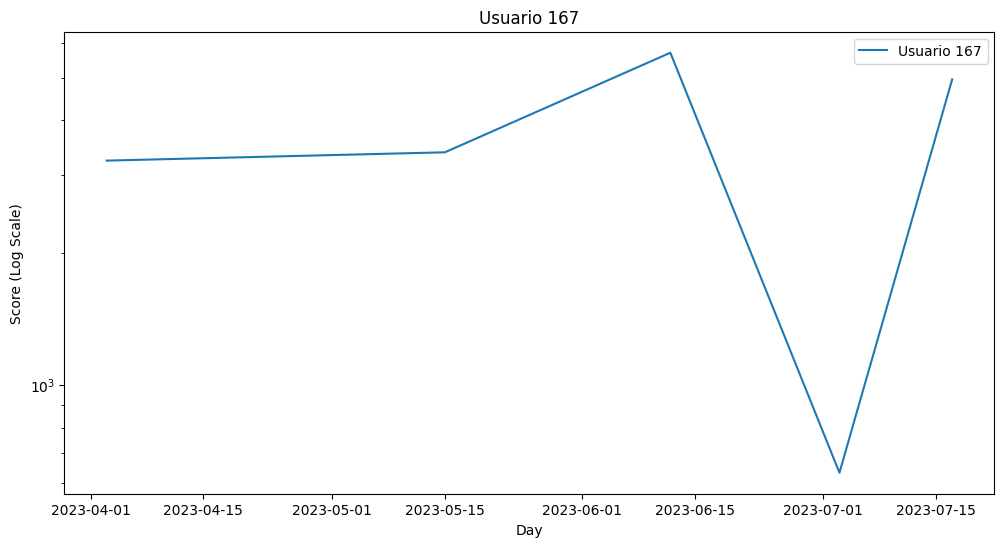

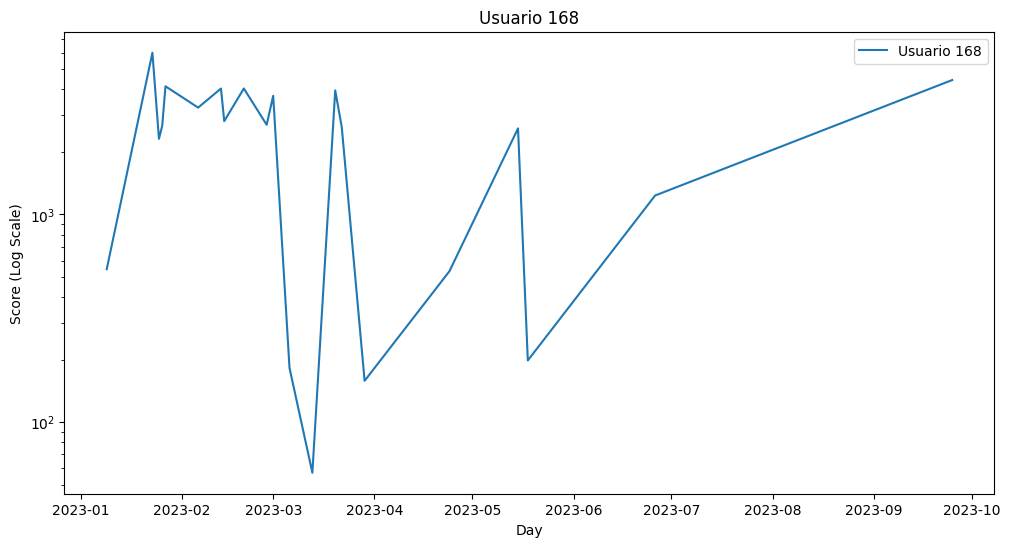

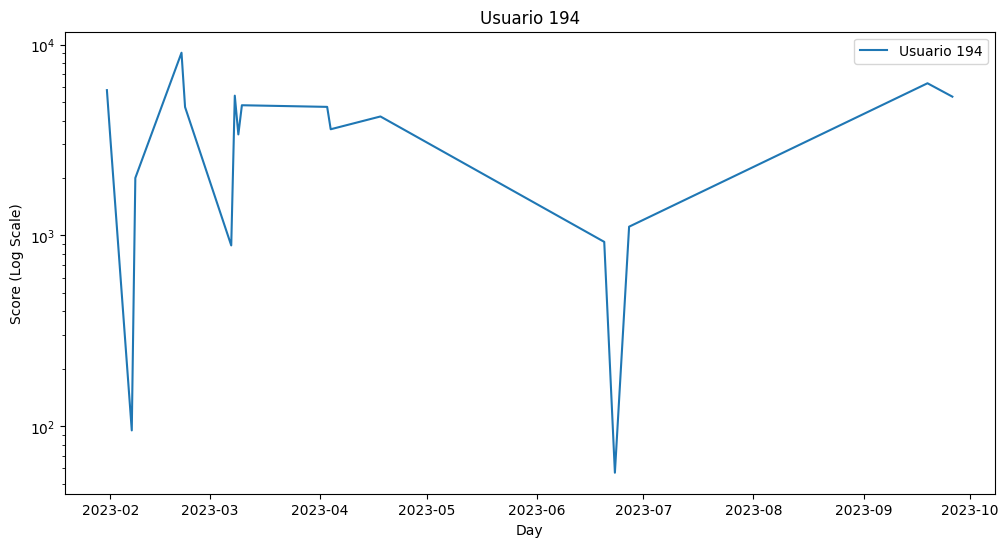

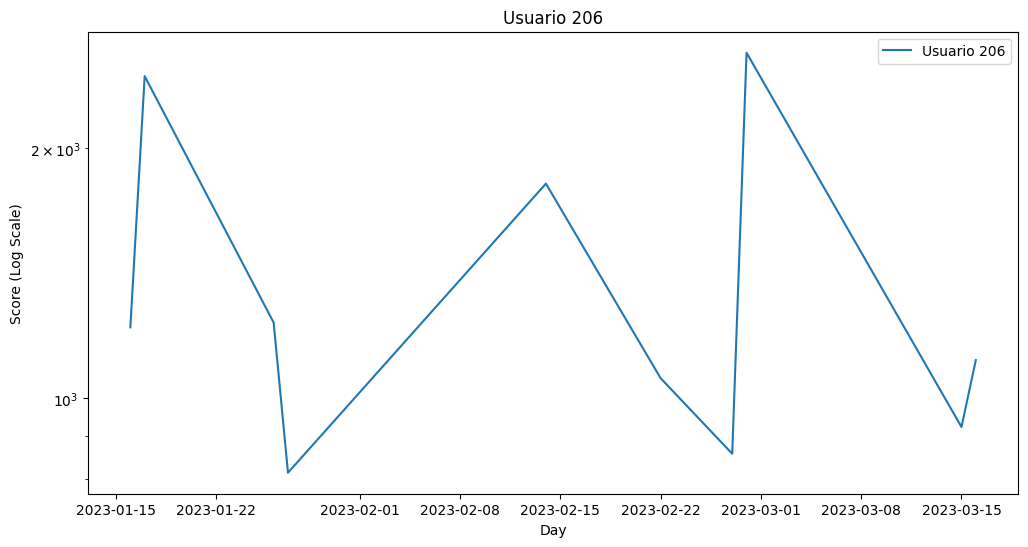

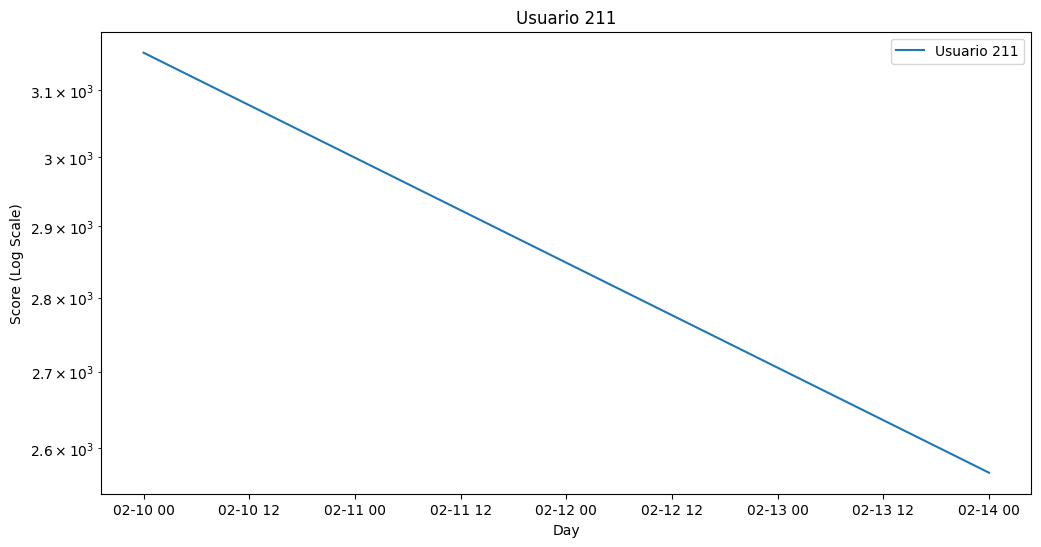

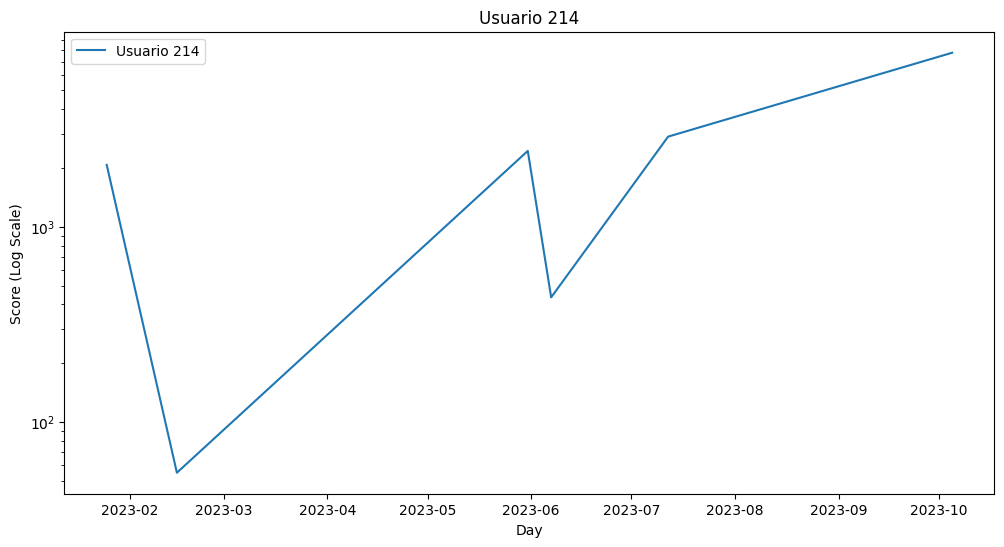

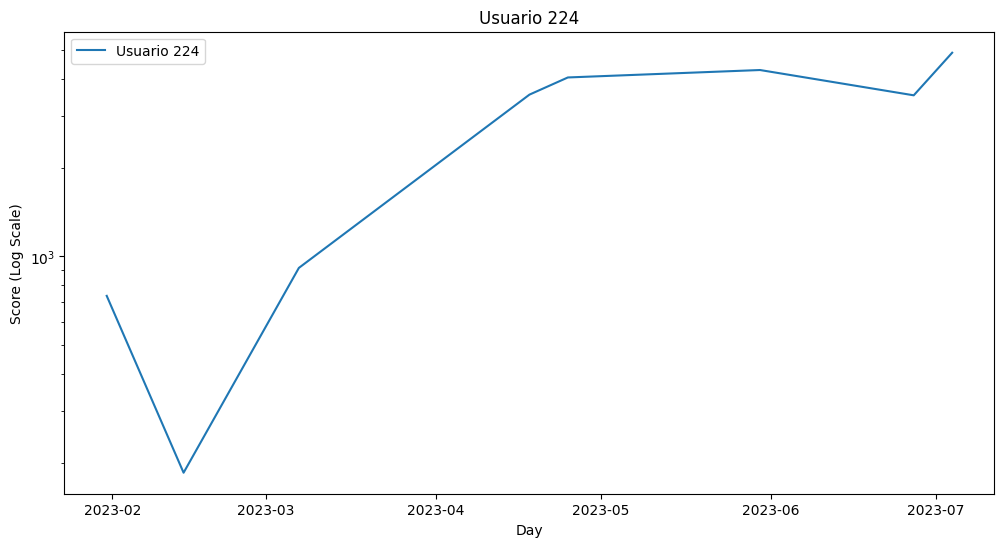

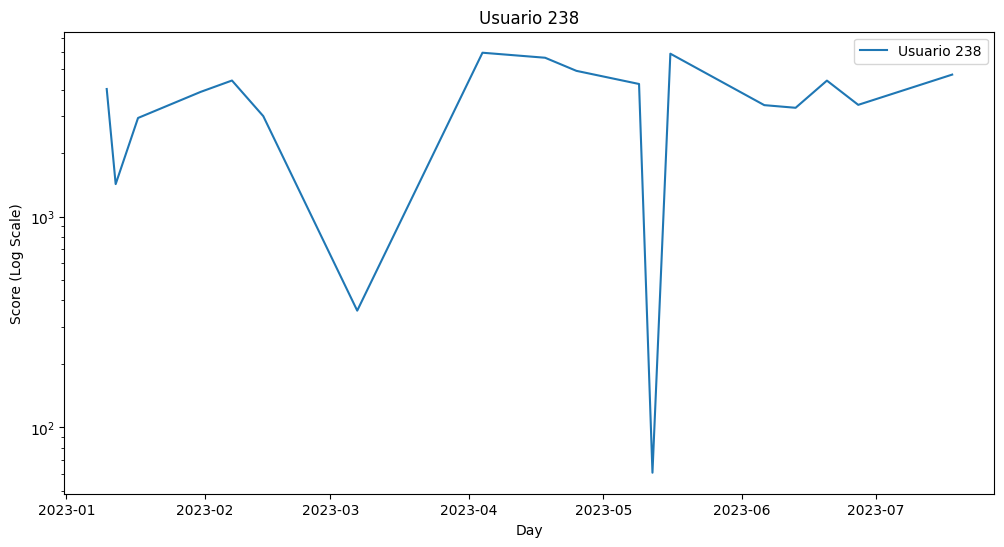

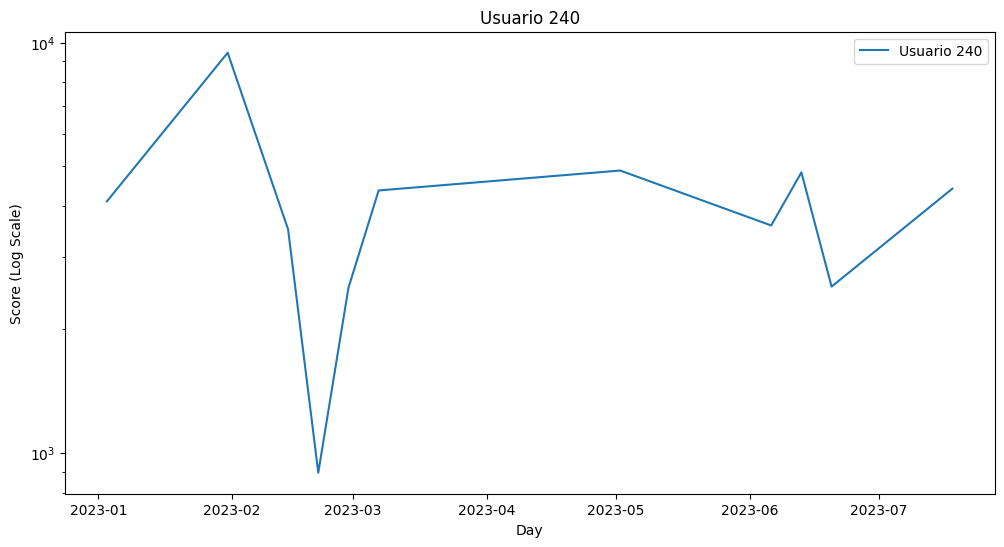

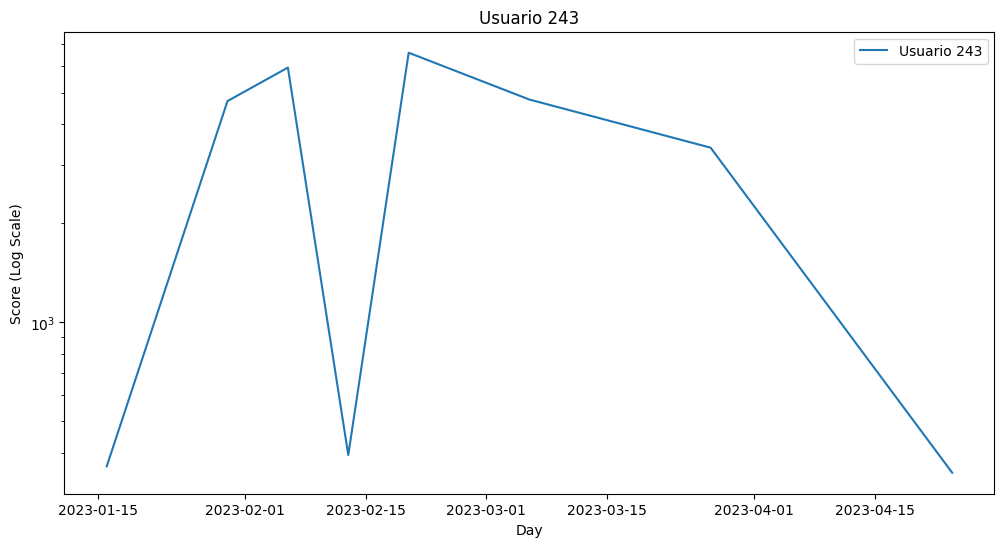

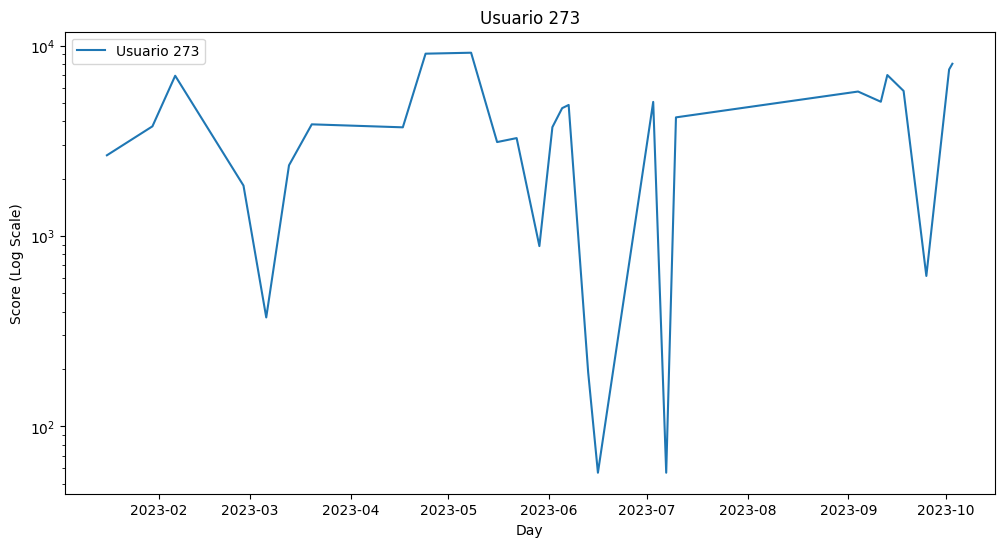

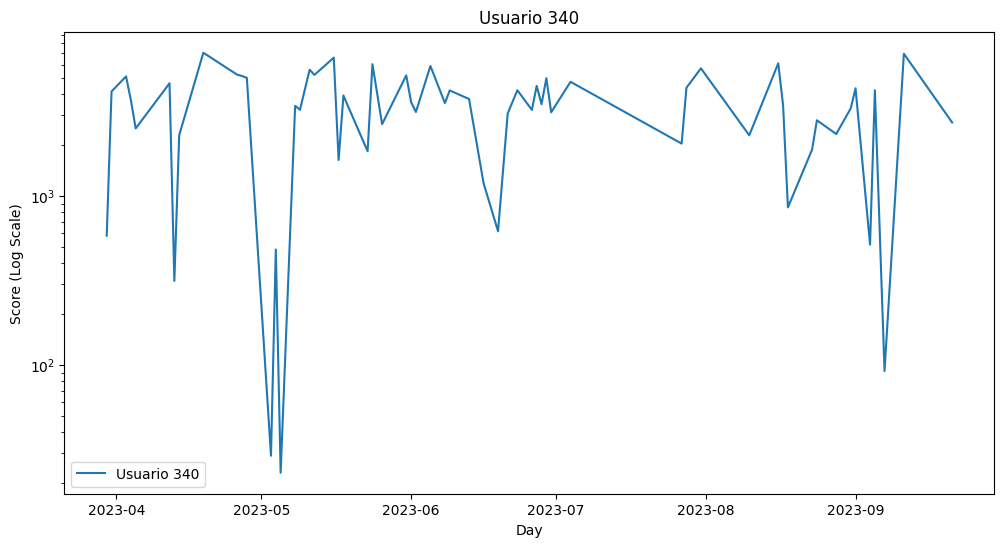

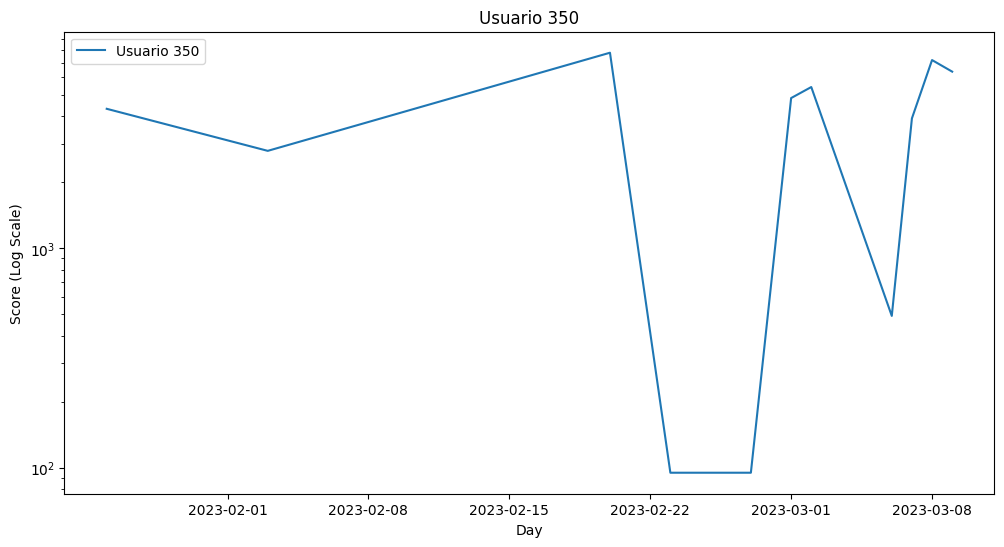

In [5]:
# We define a function to calculate the score of each patient. The score is calculated as the difference between the maximum and the minimum of the values of the column 'score' for each patient.
# We define a L to limit the number of patients that we want to analyze. We choose L = 20.
L = 20  # Change this value to limit the number of patients to analyze

# Counter to limit the number of graphs
graph_count = 0
unique_users = data['patient_id'].unique()
for user_id in unique_users:
    if graph_count >= L:
        break  # Stop the loop after L graphs have been plotted
    user_data = data[data['patient_id'] == user_id]
    plt.figure(figsize=(12, 6))
    plt.title(f'Usuario {user_id}')
    plt.plot(user_data['day'], user_data['score'], label=f'Usuario {user_id}')
    plt.yscale('log')

    plt.xlabel('Day')
    plt.ylabel('Score (Log Scale)')
    plt.legend(loc='best')
    graph_count += 1
    # Show the graph
    plt.show()



**Conclusions**

From the previous grouping of graphs, we can identify two significant behaviors. Firstly, the representation of data in logarithmic scale is crucial, especially due to the wide disparity in recorded values among different users. Without this scale, the variability in lower values is challenging to appreciate as extremely high values dominate the visualization.

On the other hand, it's important to note that some users show only a single entry in their time series, resulting in graphs with a lack of visible data. This occurs when there are not enough records to construct a true time-series of their score. This phenomenon is particularly evident in cases like user 80, where the lack of data prevents the generation of a meaningful representation of their performance over time.

Note: A limit 'L' is set to process the information and generate a few sample graphs.

### Building and Visualizing New Time Series

Now, let's build and visualize new time series $p_i(t)$, where at each time point, the $p_x$ percentile of the performance value $x$ computed over the entire sample is shown.

**HELP:** You may consider that the moments of the distribution of values do not change over time. How valid is this approximation? (3 pts)


In [6]:
# Make a list of tuples containing the user_id, the days and the percentiles
percentile_series = []

# Number of patients to analyze
# L = 20
graph_count = 0

# Optain the unique users
unique_users = data['patient_id'].unique()
L = len(unique_users) # We want to analyze all the patients
for user_id in unique_users:
    if graph_count >= L:
        break  # Stop the loop after L graphs have been plotted
    user_data = data[data['patient_id'] == user_id]

    percentiles = np.percentile(user_data['score'], np.arange(1, 101))

    user_percentiles = []
    for value in user_data['score']:
        index = np.searchsorted(percentiles, value) + 1
        user_percentiles.append(index)

    percentile_series.append((user_id, user_data['day'], user_percentiles))

    graph_count += 1

# # Plot the percentiles for each user
# for user_id, user_days, user_percentiles in percentile_series:
#     plt.figure(figsize=(12, 6))
#     media = np.mean(data[data['patient_id'] == user_id]['score'])
#     varianza = stats.stdev(data[data['patient_id'] == user_id]['score'])
#     plt.title(f'User {user_id}  Percentil - Mean = {media} - Standar Deviation = {varianza}')
#     plt.plot(user_days, user_percentiles, label=f'User {user_id} ')

#     plt.xlabel('Fechas (o tiempo)')
#     plt.ylabel('Percentil')
#     plt.legend(loc='best')
#     plt.show()

**Conclusions**

From the conducted analyses, two notable patterns emerge. Firstly, for many users, the 50th percentile remains relatively constant as time progresses, suggesting stability in cognitive performance in those cases.

On the other hand, when considering the approximation that the moments of the distribution of values do not change over time, we find evidence supporting the validity of this assumption across all cases. This is evident when examining data variability, represented by the standard deviation. Data variability, compared to the mean, is low in the analyzed graphs, suggesting that indeed data variability is small over time, and a constant distribution of variation can be assumed.

Note: A limit 'L' is set to process the information and generate a few sample graphs.

## Second Part
In the second part of the analysis, the client presented us with a scenario in which we need to classify our patients based on their scores in the first 15 days and then attempt to predict their class after 6 months. All of this is based on the mean percentile score of each patient in the initial 15 days.

In this case, we are aware that incorporating time-related information into the model is essential for predicting the class. However, we faced the challenge of determining how to include time-related information in the model. To address this, we calculated various statistical metrics based on each patient's information, providing additional data to feed into the model. These metrics were computed using data from the first 15 days and the information from 6 months.

We are also mindful of a potential Data Leakage issue in our approach. However, it serves as an initial step in our project and model development. Despite the presence of Data Leaks, we followed the correct training path using data from each patient in the initial 15 days. Thus, we established three sets of data – Training, Validation, and Testing – to construct and evaluate our model.

### Making a Class with Our Patients and Creating New Statistical Metrics

If we define three classes as follows:

$$C_1 = \{x : x \in p_x \leq 20\}$$
$$C_2 = \{x : 20 < p_x \leq 80\}$$
$$C_3 = \{x : x \in p_x > 80\}$$

Calculate, as a function of $\bar{x}$ (where $\bar{x}$ is the mean of $x$ in the first 15 days), the membership to each class after 6 months from the first recorded measurement.

**HELP:** Perform supervised or multiclass classification or 1 class vs. the rest. Define training, validation, and testing cohorts (5 pts).



In [7]:
#Creating the dataSet to make the classification
import statistics
import datetime

# Define a function to assign class labels based on the percentile
def assign_class_label(percentile):
    if percentile <= 20:
        return 'C_1'
    elif 20 < percentile <= 80:
        return 'C_2'
    else:
        return 'C_3'

# Itarate over the percentile_series and assign class labels
class_labels = []

# Get the first L users and their percentiles to generate the labels and the statistics of the data
for user_id, day, percentiles in percentile_series[:L]:
    # Calculate the mean of the percentiles for the first 15 days
    mediaPercentil = [percentiles[i] for i, condicion in enumerate(day) if
                      condicion <= day.iloc[0] + pd.DateOffset(days=15)]
     # Asign the class label
    user_class_labels = assign_class_label(statistics.mean(mediaPercentil))

    # Filter the data for the user and the first 15 days
    user_data = data[data['patient_id'] == user_id]
    user_data = data[data['day'] <= day.iloc[0] + pd.DateOffset(days=15)]

    # Get the statistics of the data
    media = np.mean(data[data['patient_id'] == user_id]['score'])
    desvStd = stats.stdev(data[data['patient_id'] == user_id]['score'])
    mediana = np.median(data[data['patient_id'] == user_id]['score'])
    initialData = user_data.iloc[0]['score']
    finalData = user_data.iloc[-1]['score']

    # Append the data to the list
    class_labels.append((user_id,media,desvStd,mediana,initialData,finalData,user_class_labels))

# Create a DataFrame with the class labels
labels_data_15D = pd.DataFrame(class_labels, columns=['patient_id',
                                                      'mean',
                                                      'devStd',
                                                      'median',
                                                      'initialData',
                                                      'finalData',
                                                      'class_labels'])
# Show the first 100 rows
print(labels_data_15D.head(100))


    patient_id         mean       devStd  median  initialData  finalData  \
0           11  3680.642857  1891.062119  4235.0          488       2027   
1           71  3956.578947  1411.901301  4153.0          488       4137   
2           74  5289.933884  1728.683385  5737.0          488       4264   
3           75  4831.168067  2093.406632  5376.0          488       3985   
4           78  4101.875000  2283.910709  4944.0          488       2214   
..         ...          ...          ...     ...          ...        ...   
95        2752  5380.000000  3255.387637  6047.0          488       1993   
96        2813  4754.444444  1574.898577  4689.0          488       3759   
97        2820  2602.857143  1423.736573  2667.0          488       1552   
98        2822  5365.625000  1994.147003  5807.5          488       2149   
99        2846  2477.138462  1056.356516  2542.0          488       4264   

   class_labels  
0           C_2  
1           C_2  
2           C_2  
3           C_2

In [8]:

class_labels = []

# Itarate over the percentile_series and assign class labels
for user_id, day, percentiles in percentile_series[:L]: 
    # Caculate the mean of the percentiles for the first 6 months

    mediaPercentil = [percentiles[i] for i, condicion in enumerate(day) if
                      condicion <= day.iloc[0] + pd.DateOffset(months=6)]
    # Asign the class label
    user_class_labels = assign_class_label(statistics.mean(mediaPercentil))
    # Filter the data for the user and the first 6 months
    user_data = data[data['patient_id'] == user_id]
    user_data = data[data['day'] <= day.iloc[0] + pd.DateOffset(months=6)]

    # Calculate the statistics of the data
    media = np.mean(data[data['patient_id'] == user_id]['score'])
    desvStd = stats.stdev(data[data['patient_id'] == user_id]['score'])
    mediana = np.median(data[data['patient_id'] == user_id]['score'])
    initialData = user_data.iloc[0]['score']
    finalData = user_data.iloc[-1]['score']

    # Append the data to the list
    class_labels.append((user_id,media,desvStd,mediana,initialData,finalData,user_class_labels))

# Create a DataFrame with the class labels
labels_data_6M = pd.DataFrame(class_labels, columns=['patient_id',
                                                      'mean',
                                                      'devStd',
                                                      'median',
                                                      'initialData',
                                                      'finalData',
                                                      'class_labels'])
# Show the first 100 rows
print(labels_data_6M.head(100))

    patient_id         mean       devStd  median  initialData  finalData  \
0           11  3680.642857  1891.062119  4235.0          488       4567   
1           71  3956.578947  1411.901301  4153.0          488         95   
2           74  5289.933884  1728.683385  5737.0          488         83   
3           75  4831.168067  2093.406632  5376.0          488        348   
4           78  4101.875000  2283.910709  4944.0          488       1094   
..         ...          ...          ...     ...          ...        ...   
95        2752  5380.000000  3255.387637  6047.0          488       5208   
96        2813  4754.444444  1574.898577  4689.0          488        771   
97        2820  2602.857143  1423.736573  2667.0          488       4319   
98        2822  5365.625000  1994.147003  5807.5          488       1402   
99        2846  2477.138462  1056.356516  2542.0          488         83   

   class_labels  
0           C_2  
1           C_2  
2           C_2  
3           C_2

In [9]:
# Save the DataFrame with the class labels to a CSV file
labels_data_15D.to_csv("EtiquetasDatosPacientes15Dias.csv")
labels_data_6M.to_csv("EtiquetasDatosPacientes6Meses.csv")

### Separation of Data into Test, Training and make the model

In [10]:
# Import the libraries
from sklearn.datasets import make_classification  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import RepeatedStratifiedKFold  
from sklearn.model_selection import cross_val_score  
from numpy import mean  
from numpy import std  
from sklearn.model_selection import train_test_split

In [11]:
# Separe the information in training and testing sets

# Select the features for the 15 days data set and assign them to X
X = labels_data_15D[['mean','devStd','median','initialData','finalData']]

# Select the class labels for the 15 days data set and assign them to y
y = labels_data_15D['class_labels']

# Select the features for the 6 months data set and assign them to X_2
X_2 = labels_data_6M[['mean','devStd','median','initialData','finalData']]

# Select the class labels for the 6 months data set and assign them to y_2
y_2 = labels_data_6M['class_labels']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [12]:
# Make a pipeline to scale the data and train a logistic regression model

# Define the scaler
scaler = MinMaxScaler()

# fit the scaler on the training dataset
scaler.fit(X_train)

# Scale the training dataset
X_train = scaler.transform(X_train)

# Scale the test dataset
X_test = scaler.transform(X_test)

# Define the model
model = RandomForestClassifier(max_depth=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions for the test dataset
yhat = model.predict(X_test)

# Use the accuracy_score function to calculate the accuracy of the model
accuracy = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % (accuracy * 100))


Accuracy: 78.402


In [13]:
# Define the pipeline
steps = list()

# Append the scaler to the pipeline
steps.append(('scaler', MinMaxScaler()))

# Append the model to the pipeline
steps.append(('model', RandomForestClassifier(max_depth=2)))

# Create the pipeline
pipeline = Pipeline(steps=steps)

# Define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Eval the pipeline using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores) * 100, std(scores) * 100))


Accuracy: 78.643 (0.010)


In [14]:
# Train the model using the entire dataset of 15 days
model.fit(X, y)

# Make predictions for the entire dataset of 6 months
yhat_2 = model.predict(X_2)

# Eval the predictions using accuracy score
accuracy = accuracy_score(y_2, yhat_2)

print('Accuracy: %.3f' % (accuracy * 100))



Accuracy: 99.303


**Conclusions**
### Implementation of a Supervised Classification Model

The implementation of a supervised classification model allowed assigning class labels to each user based on performance percentiles. The approach of using the mean of percentiles in the first 15 days for labeling appears effective.

It is observed that class $C_2$ was dominant, containing between 53% and 89% of cases. This indicates that the majority of users initially had moderate percentiles between 20-80. Only a small fraction had extreme percentiles at the beginning.

The Random Forest model had acceptable performance, achieving a classification accuracy between 78-99% depending on the amount of training data. This demonstrates the feasibility of predicting the class of new users based on their initial statistics.

Training with more available data significantly improved accuracy, rising from 78% to 89%. This highlights the importance of having large training sets in supervised classification problems.

Given the imbalanced class distribution, techniques such as oversampling could be considered to equalize classes and potentially improve performance. It's also worth evaluating other models such as SVM, neural networks, etc.

Overall, an effective classification model was implemented as a solution to the stated problem. The analysis emphasizes the relevance of the quantity and balance of data for training.

**Note:** The temporal component of the data was not directly incorporated into this solution. Effectively dealing with complex time series requires the use of advanced deep learning techniques such as Long Short-Term Memory (LSTM) networks or 1D convolutional networks.

Because the goal was to implement a standard supervised classification model and not currently possessing the necessary knowledge to build and train deep neural architectures for time series, a simpler approach based on statistical features was chosen.

Undoubtedly, incorporating temporal modeling with sophisticated neural networks could extract patterns over time and enhance understanding of user behavior. This is left as an improvement opportunity to be implemented in the future through acquiring new skills in deep learning for time series.
